In [1]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import numpy as np
import pandas as pd
from os import path
from PIL import Image
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("Austin_Animal_Center_Intakes.csv")
df = df[df["Animal Type"] == 'Dog']

In [3]:
df.head()

,Unnamed: 0,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,0,A748291,*Madison,05/01/2017 02:26:00 PM,05/01/2017 02:26:00 PM,S Pleasant Valley Rd And E Riverside Dr in Aus...,Stray,Normal,Dog,Intact Female,10 months,Pit Bull Mix,Black
1,1,A750529,NaN,05/28/2017 01:22:00 PM,05/28/2017 01:22:00 PM,8312 North Ih 35 in Austin (TX),Stray,Normal,Dog,Intact Female,5 months,Miniature Schnauzer Mix,White/Cream
3,3,A748238,NaN,05/01/2017 10:53:00 AM,05/01/2017 10:53:00 AM,Airport Blvd And Oak Springs Dr in Austin (TX),Stray,Normal,Dog,Intact Male,3 years,Bichon Frise Mix,White
4,4,A683644,*Zoey,07/13/2014 11:02:00 AM,07/13/2014 11:02:00 AM,Austin (TX),Owner Surrender,Nursing,Dog,Intact Female,4 weeks,Border Collie Mix,Brown/White
5,5,A780880,*Eeyore,09/29/2018 12:24:00 PM,09/29/2018 12:24:00 PM,Outside Jurisdiction,Owner Surrender,Sick,Dog,Neutered Male,6 years,Pit Bull/Chinese Sharpei,Tan/White


In [4]:
'''
print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))

print("There are {} types of wine in this dataset such as {}... \n".format(len(df.variety.unique()),
                                                                           ", ".join(df.variety.unique()[0:5])))

print("There are {} countries producing wine in this dataset such as {}... \n".format(len(df.country.unique()),
                                                                                      ", ".join(df.country.unique()[0:5])))
                                                                                      
'''

'\nprint("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))\n\nprint("There are {} types of wine in this dataset such as {}... \n".format(len(df.variety.unique()),\n                                                                           ", ".join(df.variety.unique()[0:5])))\n\nprint("There are {} countries producing wine in this dataset such as {}... \n".format(len(df.country.unique()),\n                                                                                      ", ".join(df.country.unique()[0:5])))\n                                                                                      \n'

In [5]:
text = df['Breed'][0]

In [6]:
wordcloud = WordCloud().generate(text)

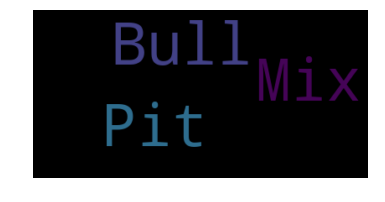

In [7]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [8]:
text = " ".join(review for review in df['Breed'])
print ("There are {} words in the combination of all review.".format(len(text)))
stopwords = set(STOPWORDS)
stopwords.update(["Mix", "mix"])
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

There are 1153521 words in the combination of all review.


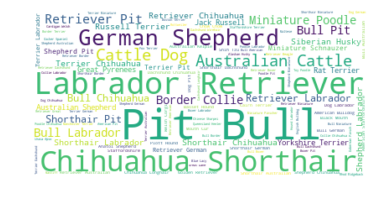

In [9]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [10]:

dog_mask = np.array(Image.open("pbsil.png"))

dog_mask

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255

In [11]:
'''
def transform_format(val):
    if val.all() == 0:
        return 255
    else:
        return val

    
# Transform your mask into a new one that will work with the function:
transformed_dog_mask = np.ndarray((dog_mask.shape[0],dog_mask.shape[1]), np.int32)

for i in range(len(dog_mask)):
    transformed_dog_mask[i] = list(map(transform_format, dog_mask[i]))
    
'''

'\ndef transform_format(val):\n    if val.all() == 0:\n        return 255\n    else:\n        return val\n\n    \n# Transform your mask into a new one that will work with the function:\ntransformed_dog_mask = np.ndarray((dog_mask.shape[0],dog_mask.shape[1]), np.int32)\n\nfor i in range(len(dog_mask)):\n    transformed_dog_mask[i] = list(map(transform_format, dog_mask[i]))\n    \n'

In [12]:
transformed_dog_mask = dog_mask 

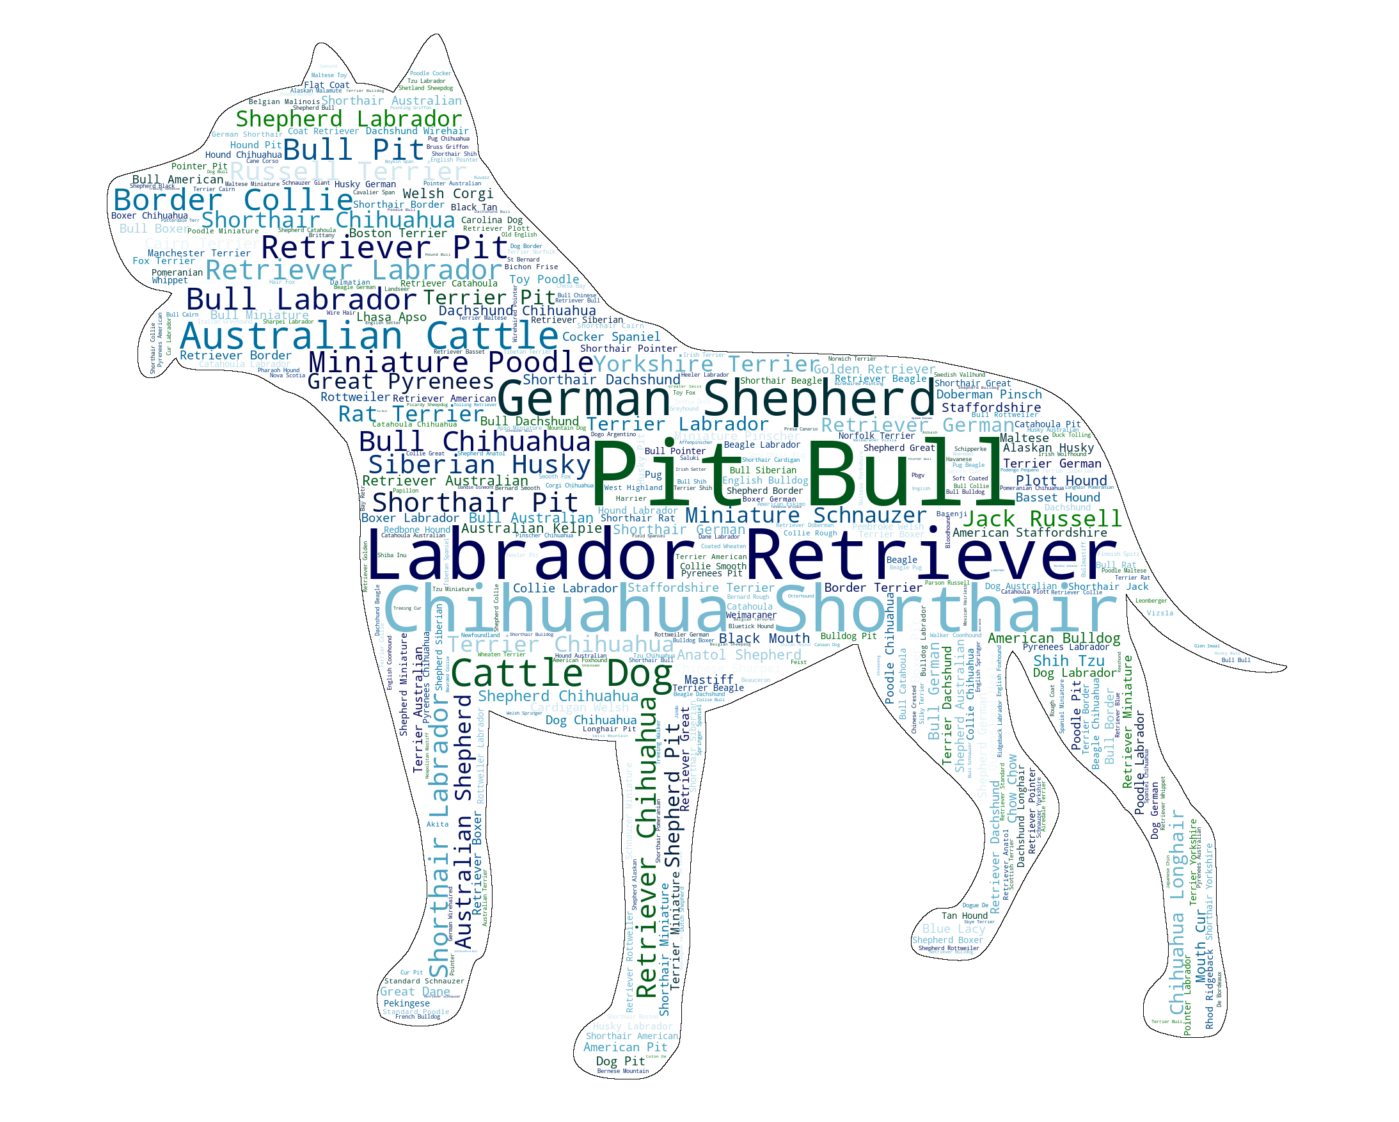

In [14]:
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_dog_mask,
               stopwords=stopwords, contour_width=.1, contour_color='black', colormap = 'ocean')

# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file("dog_cloud.png")
wc.to_file("dog_cloud.pdf")

# show
plt.figure(figsize=[30,20])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()